In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext sql 
%pylab inline
%matplotlib inline

import pandas as pd
import os, random

import pickle,time

tmstmp = time.strftime("%m-%d-%Y",time.localtime())

# Set up the local source files
TOP = os.getcwd().replace('notebooks','')
LIB = TOP+'lib'
if not LIB in sys.path: sys.path.append(LIB)

DAT_DIR = TOP + '/data/'
RES_DIR = TOP + '/results/'
FIG_DIR = TOP + '/figs/'

from organtox import *

DB = openMongo(host='pb.epa.gov',user='ishah',passwd='ishah',db='organtox_v1')
GNR = openMongo(host='pb.epa.gov',user='ishah',passwd='ishah',db='genra_v3')
DB.collection_names()

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[u'chm_fp',
 u'ml_lr_v1',
 u'ml_study_lr_v1',
 u'bio_fp',
 u'ml_summary_v2',
 u'ml_summary_v1',
 u'ml_run_v1',
 u'tox_fp',
 u'ml_study_run_v1',
 u'tox2_fp']

In [142]:
GNR.toxref.find_one(dict(study_type='CHR'),dict(_id=0,les_cat=0,ID=0))


{u'DSSTox_GSID': u'20895',
 u'ID': u'C2385855',
 u'admin_method': u'Feed',
 u'admin_route': u'Oral',
 u'chemical_casrn': u'2385-85-5',
 u'chemical_id': u'DSSTox_GSID_20895',
 u'chemical_name': u'Mirex',
 u'chemical_sets': u'phase2;tox21',
 u'citation': u'Huff J (1990) TOXICOLOGY AND CARCINOGENESIS STUDIES OF MIREX (1,1a,2,2,3,3a,4,5,5,5a,5b,6-Dodecachlorooctahydro-1,3,4-metheno-1H-cyclobuta[cd] pentalene) (CAS NO. 2385-85-5) IN F344/N RATS (FEED STUDIES).  NTP TR 313, NIH Publication No. 90-2569.',
 u'comments_animal': u'Several months after the first study had started, it was decided, based on lack of clinical signs and only random/minor variations of weight gain, that females could tolerate greater concentrations of mirex which is represented by the Other groups below',
 u'data_source': u'ntp',
 u'direction': u'Increase',
 u'dose': 1.95,
 u'dose_end': 2.0,
 u'dose_end_unit': u'year',
 u'dose_level': 4,
 u'dose_start_unit': u'day',
 u'dosing_period': u'Initial-to-Terminal',
 u'dsstox_

In [136]:
GNR.toxref.distinct('study_type')
GNR.toxref.find({'study_type':'REP'}).distinct('endpoint_target')
GNR.toxref.find({'study_type':'DEV'}).distinct('endpoint_target')

[u'Placenta',
 u'ClinicalSigns',
 u'FoodConsumption',
 u'BodyWeight',
 u'Mortality',
 u'Postimplantationloss',
 u'Resorptions',
 u'LiveFetuses',
 u'LitterViability',
 u'Axial',
 u'Cranial',
 u'Liver',
 u'Deadfetuses',
 u'Littersize',
 u'Uterus',
 u'TissueNOS',
 u'Nose',
 u'WaterConsumption',
 u'TotalLitterLoss',
 u'Stomach',
 u'Aborted',
 u'Pregnancy',
 u'IntestineLarge',
 u'Lung',
 u'Ureter',
 u'Kidney',
 u'IntestineSmall',
 u'Thymus',
 u'JawHyoid',
 u'AdrenalGland',
 u'Eye',
 u'Locomotion',
 u'Incisoreruption',
 u'Appendicular',
 u'LymphNode',
 u'Skin',
 u'Spleen',
 u'Hematology',
 u'Motoractivity',
 u'Sexratio',
 u'Preimplantationloss',
 u'PregnancyIndex',
 u'Urinalysis',
 u'Unclassified',
 u'Gestationalinterval',
 u'Implantations',
 u'AnogenitalDistance',
 u'Prostate',
 u'SeminalVesicle',
 u'NippleDevelopment',
 u'Other',
 u'Testis',
 u'ThyroidGland',
 u'Viabilityindex',
 u'PrematureDelivery',
 u'Gallbladder',
 u'Mating',
 u'Vagina',
 u'UrinaryBladder',
 u'Bloodvessel',
 u'EstrousC

In [123]:
Res = []
TOX = DB.tox_fp.distinct('tox_fpp1.ds')
for tox in TOX:
    n_p,n_n = DB.tox_fp.find({'tox_fpp1.ds':tox}).count(),DB.tox_fp.find({'tox_fpn1.ds':tox}).count()
    s,o=tox.split(':')
    Res.append(dict(study=s,organ=o,val_of='pos',n=n_p))
    Res.append(dict(study=s,organ=o,val_of='neg',n=n_n))
DS_n = pd.pivot_table(pd.DataFrame(Res),index='organ',columns=['study','val_of'],values='n')
DS_n.fillna(0,inplace=True)
DS_n.sort(columns=('CHR','pos'),ascending=True,inplace=True)


In [125]:
DS_n.columns

MultiIndex(levels=[[u'CHR', u'DEV', u'DNT', u'MGR', u'NEU', u'REP', u'SUB'], [u'neg', u'pos']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'study', u'val_of'])

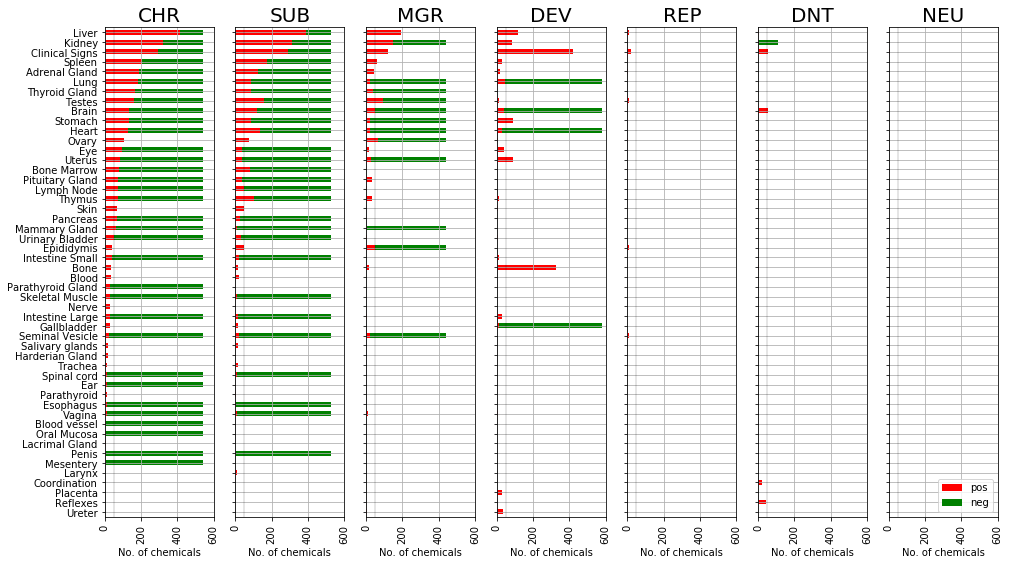

In [126]:
import pylab as pl
fig = pl.figure(figsize=(16,9))
STUDIES=[u'CHR',u'SUB', 'MGR','DEV','REP','DNT','NEU']
k=0
for s in STUDIES:
    k+=1
    ax=pl.subplot(1,len(STUDIES),k)
    ax.vlines(50,-1,DS_n.shape[0],linestyles='-',lw=0.2)
    DS_n[s][['pos','neg']].ix[:60].plot.barh(stacked=True,legend=False,ax=ax,lw=0, color=['red','green'])
    ax.set_title(s,fontdict=dict(size=20))
    frame1 = plt.gca()
    if k>1: 
        for ylab in ax.get_yticklabels():ylab.set_visible(False)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlim(0,700)
    ax.set_ylabel('')
    #ax.set_ylim(0,600)
    ax.grid(True)
    ax.set_xlim(0,600)
    ax.set_xlabel('No. of chemicals')
ax.legend(loc=4)
#fig.savefig(FIG_DIR+'Figure-1.png')
#fig.savefig(FIG_DIR+'Figure-1.svg')

In [117]:
DB.ml_study_lr_v1.find_one(dict(dt_in='bio',lr='SVCR0',pred='DEV'))


{u'_id': ObjectId('59a5b8d8072e60f19ea40007'),
 u'dt_in': u'bio',
 u'dt_out': u'tox',
 u'lr': u'SVCR0',
 u'n_ds': 5,
 u'n_neg': 37,
 u'n_obs': 429,
 u'n_pos': 392,
 u'perf_cvt': {u'acc_mn': 0.9262512674328199,
  u'acc_sd': 0.01779217417172253,
  u'bacc_mn': 0.9618603243706798,
  u'bacc_sd': 0.00914227207165643,
  u'cv_kfold': 5,
  u'f1_mn': 0.960967678036853,
  u'f1_sd': 0.009425601161676633,
  u'lr': u'SVCR0',
  u'n_iter': 10,
  u'n_test_mn': 85,
  u'n_train_mn': 344,
  u'npv_mn': 0.6037518668200488,
  u'npv_sd': 0.38155368963411046,
  u'ppv_mn': 0.9356956464055535,
  u'ppv_sd': 0.01774874105778011,
  u'pt': u'cvt',
  u'sens_mn': 0.988025002335806,
  u'sens_sd': 0.014231178616496915,
  u'spec_mn': 0.9356956464055535,
  u'spec_sd': 0.01774874105778011},
 u'perf_trn': {u'acc': 0.9230769230769231,
  u'bacc': 0.9608994306942635,
  u'ds': [u'BSK_4H_uPAR_up',
   u'BSK_CASM3C_TissueFactor_up',
   u'NVS_ENZ_hPPP1CA_Activator',
   u'BSK_3C_MIG_up',
   u'BSK_3C_Thrombomodulin_down'],
  u'f1': 0

In [47]:
for i in ['pred','lr','n_ds','dt_in','dt_out','n_obs','ds_id',
          'perf_cvt.f1_mn','perf_cvt.bacc_mn','perf_cvt.ppv_mn']: 
    print '>',i
    DB.ml_study_lr_v1.create_index(i)

> pred
> lr
> n_ds
> dt_in
> dt_out
> n_obs
> ds_id
> perf_cvt.f1_mn
> perf_cvt.bacc_mn
> perf_cvt.ppv_mn


In [121]:
from organtox import *

DB.ml_study_summary_v1.drop()
for pred in DB.ml_study_lr_v1.distinct('pred'):
    predPerfSummary2(pred,Col_ml=DB.ml_study_lr_v1,Col_sum=DB.ml_study_summary_v1)
    print '>',pred,DB.ml_study_summary_v1.count()

> DNT 1296
> MGR 6592
> SUB 16800
> CHR 27840
> DEV 39680


In [122]:
for i in ['pred','lr','n_ds','dt_in','dt_out','n_obs','f1_mn','pt','sens_mn','spec_mn','bacc_mn','acc_mn','ppv_mn']: 
    print '>',i
    DB.ml_study_summary_v1.create_index(i)

> pred
> lr
> n_ds
> dt_in
> dt_out
> n_obs
> f1_mn
> pt
> sens_mn
> spec_mn
> bacc_mn
> acc_mn
> ppv_mn


In [67]:
# Results: Machine Learning 

# What are the top classifiers ?

X = pd.DataFrame(list(DB.ml_study_summary_v1.find({'pt':'cvt','n_ds':{'$lt':25},'dt_in':'chm'},
                                             dict(_id=0,pt=0,dt_out=0))))
X.shape

(192, 21)

In [68]:
Res = []
#for (pred,dt),P_i in X.groupby(['pred','dt_in']):
for (pred),P_i in X.groupby(['pred']):
    Res.append(P_i.sort('f1_mn',ascending=False).reset_index(drop=True).head(1))

Perf1 = pd.concat(Res)
Perf1
                                             

,acc_mn,acc_sd,bacc_mn,bacc_sd,dt_in,f1_mn,f1_sd,lr,n_ds,n_neg,...,n_pos,npv_mn,npv_sd,ppv_mn,ppv_sd,pred,sens_mn,sens_sd,spec_mn,spec_sd
0,0.964156,0.016073,0.981635,0.008053,chm,0.981279,0.008340,KNN0,20,18,...,309,0.910379,0.192187,0.965943,0.016316,CHR,0.997326,0.007111,0.965943,0.016316
0,0.865186,0.039002,0.925092,0.020952,chm,0.921821,0.022080,RF0,20,42,...,225,0.756592,0.239806,0.875600,0.035296,DEV,0.974585,0.025133,0.875600,0.035296
0,0.956894,0.017148,0.977667,0.008688,chm,0.977183,0.008977,SVCR0,20,29,...,371,0.931122,0.156587,0.958259,0.016036,SUB,0.997074,0.007186,0.958259,0.016036


In [119]:
X = pd.DataFrame(list(DB.ml_study_summary_v1.find({'pt':'cvt','n_ds':{'$lt':1000}},
                                             dict(_id=0,pt=0,dt_out=0))))

Res = []
for (pred),P_i in X.groupby(['pred']):
    for (dt), P_ij in P_i.groupby(['dt_in']):
        for (lr),P_ijk in P_ij.groupby(['lr']):
            Res.append(P_ijk.sort('f1_mn',ascending=False).reset_index(drop=True).head(1))
Perf1 = pd.concat(Res).reset_index(drop=True)


Perf1['res2']=Perf1.apply(lambda x: "%s:%d/%s/%s:%d" % (x.pred,x.n_obs,x.lr,x.dt_in,x.n_ds),axis=1)
Perf1['res2_f1']=Perf1.apply(lambda x: "%3.2f±%3.2f" % (x.f1_mn,x.f1_sd),axis=1)
Perf1['res2_sn']=Perf1.apply(lambda x: "%3.2f±%3.2f" % (x.sens_mn,x.sens_sd),axis=1)
Perf1['res2_sp']=Perf1.apply(lambda x: "%3.2f±%3.2f" % (x.spec_mn,x.spec_sd),axis=1)
Perf1['res2_ppv']=Perf1.apply(lambda x: "%3.2f±%3.2f" % (x.ppv_mn,x.ppv_sd),axis=1)

P1 = None
for p in Perf1.pred.unique():
    P1 = pd.concat((P1,Perf1.query("pred=='%s'" % p).sort('f1_mn',ascending=False).head(1)))

In [120]:
Perf1.query("pred=='SUB' and dt_in=='bio'")[['res2','pred','lr','n_pos','n_neg','dt_in','n_ds','res2_f1','res2_sn','res2_sp','res2_ppv']]

,res2,pred,lr,n_pos,n_neg,dt_in,n_ds,res2_f1,res2_sn,res2_sp,res2_ppv
160,SUB:398/CART0/bio:85,SUB,CART0,371,27,bio,85,0.98±0.01,0.98±0.02,0.98±0.01,0.98±0.01
161,SUB:398/CART1/bio:50,SUB,CART1,371,27,bio,50,0.98±0.01,0.98±0.02,0.98±0.01,0.98±0.01
162,SUB:398/KNN0/bio:85,SUB,KNN0,371,27,bio,85,0.99±0.01,1.00±0.01,0.98±0.01,0.98±0.01
163,SUB:398/KNN1/bio:65,SUB,KNN1,371,27,bio,65,0.98±0.01,1.00±0.01,0.97±0.01,0.97±0.01
164,SUB:398/NB/bio:5,SUB,NB,371,27,bio,5,0.95±0.03,0.95±0.05,0.95±0.02,0.95±0.02
165,SUB:398/RF0/bio:85,SUB,RF0,371,27,bio,85,0.99±0.01,1.00±0.01,0.98±0.01,0.98±0.01
166,SUB:398/SVCL0/bio:95,SUB,SVCL0,371,27,bio,95,0.98±0.01,0.98±0.02,0.98±0.01,0.98±0.01
167,SUB:398/SVCR0/bio:85,SUB,SVCR0,371,27,bio,85,0.99±0.01,1.00±0.00,0.98±0.01,0.98±0.01


In [118]:
Table1 = P1.sort('f1_mn',ascending=False)[['res2','pred','lr','dt_in','n_ds','res2_f1','res2_sn','res2_sp','res2_ppv']]
Table1.columns=['Classifier id','Organ Toxicity','Algorithm','dt','n_ds','F1 Score','Sensitivity','Specificity','PPV']
#Table1.to_excel(DAT_DIR+'Table-1.xlsx',encoding='utf8')
Table1

,Classifier id,Organ Toxicity,Algorithm,dt,n_ds,F1 Score,Sensitivity,Specificity,PPV
15,CHR:421/SVCR0/bct:75,CHR,SVCR0,bct,75,1.00±0.00,1.00±0.00,0.99±0.01,0.99±0.01
159,SUB:392/SVCR0/bct:85,SUB,SVCR0,bct,85,0.99±0.01,1.00±0.00,0.98±0.01,0.98±0.01
63,DEV:429/SVCR0/bio:95,DEV,SVCR0,bio,95,0.99±0.01,1.00±0.00,0.98±0.01,0.98±0.01
95,DNT:76/SVCR0/bct:85,DNT,SVCR0,bct,85,0.98±0.02,1.00±0.01,0.97±0.03,0.97±0.03
127,MGR:346/SVCR0/bio:95,MGR,SVCR0,bio,95,0.96±0.01,1.00±0.00,0.92±0.03,0.92±0.03


In [86]:
Table1 = (P1
          .query("n_pos<n_neg+20")
          .sort('f1_mn',ascending=False)[['res2','pred','lr','dt_in','n_ds','res2_f1','res2_sn','res2_sp','res2_ppv']]
         )
Table1.columns=['Classifier id','Organ Toxicity','Algorithm','dt','n_ds','F1 Score','Sensitivity','Specificity','PPV']
#Table1.to_excel(DAT_DIR+'Table-1.xlsx',encoding='utf8')
Table1

,Classifier id,Organ Toxicity,Algorithm,dt,n_ds,F1 Score,Sensitivity,Specificity,PPV
